In [3]:
#Imports 
from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

#Work with Jackson Lin and Annie Yang


In [4]:
# Part 1 step 1
driver = webdriver.Chrome()
url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html"
driver.get(url)


# Parse the retrieved HTML with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
table = soup.find('table')


# get table headers
headers = [th.get_text() for th in table.find_all('th')]


# get row data
rows = table.find_all('tr')[1:] 
data = [[td.get_text().strip() for td in row.find_all('td')] for row in rows]


# Create a DataFrame
tb = pd.DataFrame(data, columns = headers)


tb.columns = ['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie']


# print results
print(tb.head(10))





  rank  x_class        date region start_time max_time end_time         movie
0    1     X40+  2003/11/04   0486      19:29    19:53    20:06  View archive
1    2  X28.57+  2001/04/02   9393      21:32    21:51    22:03  View archive
2    3  X24.57+  2003/10/28   0486      09:51    11:10    11:24  View archive
3    4  X24.42+  2005/09/07   0808      17:17    17:40    18:03  View archive
4    5  X20.67+  2001/04/15   9415      13:19    13:50    13:55  View archive
5    6   X14.36  2003/10/29   0486      20:37    20:49    21:01  View archive
6    7   X13.37  2017/09/06   2673      11:53    12:02    12:10  View archive
7    8   X12.97  1997/11/06   8100      11:49    11:55    12:01  View archive
8    9   X12.95  2006/12/05   0930      10:18    10:35    10:45  View archive
9   10   X11.96  2003/11/02   0486      17:03    17:25    17:39  View archive


In [5]:
# Step 2
# dropping the last column
tb.drop(['movie'], axis = 1, inplace=True)
tb.rename(columns={'start_time': 'start_datetime', 'max_time': 'max_datetime', 'end_time': 'end_datetime'}, inplace=True)

# iterate each row in the table
for i, j in tb.iterrows():
    for time in ['start_datetime', 'max_datetime', 'end_datetime']:
        #adding the values
        date_time = f"{j['date']} {j[time]}"
        #converts the concated string into a datetime object
        tb.at[i, time] = pd.to_datetime(date_time)


tb.drop(['date'], axis=1, inplace=True)

# if there are no regions
tb.replace('-', 'NaN', inplace=True) 
print(tb.head(10))

  rank  x_class region       start_datetime         max_datetime  \
0    1     X40+   0486  2003-11-04 19:29:00  2003-11-04 19:53:00   
1    2  X28.57+   9393  2001-04-02 21:32:00  2001-04-02 21:51:00   
2    3  X24.57+   0486  2003-10-28 09:51:00  2003-10-28 11:10:00   
3    4  X24.42+   0808  2005-09-07 17:17:00  2005-09-07 17:40:00   
4    5  X20.67+   9415  2001-04-15 13:19:00  2001-04-15 13:50:00   
5    6   X14.36   0486  2003-10-29 20:37:00  2003-10-29 20:49:00   
6    7   X13.37   2673  2017-09-06 11:53:00  2017-09-06 12:02:00   
7    8   X12.97   8100  1997-11-06 11:49:00  1997-11-06 11:55:00   
8    9   X12.95   0930  2006-12-05 10:18:00  2006-12-05 10:35:00   
9   10   X11.96   0486  2003-11-02 17:03:00  2003-11-02 17:25:00   

          end_datetime  
0  2003-11-04 20:06:00  
1  2001-04-02 22:03:00  
2  2003-10-28 11:24:00  
3  2005-09-07 18:03:00  
4  2001-04-15 13:55:00  
5  2003-10-29 21:01:00  
6  2017-09-06 12:10:00  
7  1997-11-06 12:01:00  
8  2006-12-05 10:45:00  
9

In [6]:
# Step 3


# scrape the data from nasa
url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
driver.get(url)


#finding the data
soup = BeautifulSoup(driver.page_source, 'html.parser')


# Find the <pre> tag containing the data
data_element = soup.find('pre')
data_text = data_element.text


# processing the data
data_lines = data_text.split('\n')[11:]


# converting the data into a dataframe opject
nasa_data = pd.DataFrame(data_lines)
# setting the index
nasa_data.index = range(1, len(nasa_data) + 1)
#splitting the string
nasa_data = nasa_data[0].str.split(expand = True)

# droppig height, proton, X-ray, and plots
nasa_data = nasa_data.drop(nasa_data.columns[[15, 16, 17, 18, 19, 20, 21, 22, 23]], axis = 1)
nasa_data.columns = ['starting_date', 'starting_time', 'ending_date', 'ending_time', 'starting_frequency', 'ending_frequency', 'source_location', 'solar_region', 'flare_importance', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'plots']
nasa_data.replace(['-----', '----'], 'NaN', inplace = True) 


# printing the data
print(nasa_data.head(10))


   starting_date starting_time ending_date ending_time starting_frequency  \
1     1997/01/20         08:56       01/20       09:02              14000   
2     1997/04/01         14:00       04/01       14:15               8000   
3     1997/04/07         14:30       04/07       17:30              11000   
4     1997/05/12         05:15       05/14       16:00              12000   
5     1997/05/21         20:20       05/21       22:00               5000   
6     1997/09/23         21:53       09/23       22:16               6000   
7     1997/11/03         05:15       11/03       12:00              14000   
8     1997/11/03         10:30       11/03       11:30              14000   
9     1997/11/04         06:00       11/05       04:30              14000   
10    1997/11/06         12:20       11/07       08:30              14000   

   ending_frequency source_location solar_region flare_importance cme_date  \
1             12000          ------          NaN              NaN    01/20

In [7]:
# Step 4
# recode missing entries as NaN
nasa_data.replace(['----', '-----', '------', '--/--', '--:--', '????', 'FILA', 'DSF', 'EP','EP?', 'DIM'], 'NaN', inplace = True) 


# making a new column is_halo
nasa_data['is_halo'] = np.where(nasa_data['cme_angle'] == 'Halo', 'True', 'False')


# changing the halo entries in the cme_angle as NA
nasa_data['cme_angle'] = nasa_data['cme_angle'].replace('Halo', 'NA')


# creating a new column for if width is lower bound
# checking if the width is given as a lower bound
nasa_data['width_lower?'] = np.where(nasa_data['cme_width'].str.contains('>'), 'True', 'False')


# removing non-numeric part
nasa_data['cme_width'] = nasa_data['cme_width'].str.replace('>','')


# changing the 24:00 to 00:00 for better representation
nasa_data['ending_time'] = nasa_data['ending_time'].replace('24:00', '00:00')


# combine date and time columns for start, end and cme 
nasa_data.replace('NaN', pd.NA, inplace=True)


# combine starting date and starting time into one
nasa_data['starting_datetime'] = pd.to_datetime(nasa_data['starting_date'] + ' ' + nasa_data['starting_time'])


# getting the year
nasa_data['year'] = nasa_data['starting_date'].str[:4]


# combine ending date, year, and ending time into one
nasa_data['ending_datetime'] = pd.to_datetime(nasa_data['year'] + '/' + nasa_data['ending_date'] + ' ' + nasa_data['ending_time'], errors='coerce', format='%Y/%m/%d %H:%M')


# combine cme date and time into one
nasa_data['cme_datetime'] = pd.to_datetime(nasa_data['year'] + '/' + nasa_data['cme_date'] + ' ' + nasa_data['cme_time'], errors='coerce', format='%Y/%m/%d %H:%M')


# dropping the combined columns
nasa_data.drop(['starting_date', 'starting_time', 'ending_date', 'ending_time', 'cme_date', 'cme_time', 'year'], axis=1, inplace=True)


# making a new column order
new_column_order = [
    'starting_datetime', 'ending_datetime', 'starting_frequency', 'ending_frequency', 'source_location', 'solar_region',
    'flare_importance', 'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed', 'plots',
    'is_halo', 'width_lower?'
]


# reordering the columns so that the new columns match the old ones
nasa_data = nasa_data[new_column_order]
nasa_data.index = range(0, len(nasa_data))


print(nasa_data.head(10))



    starting_datetime     ending_datetime starting_frequency ending_frequency  \
0 1997-01-20 08:56:00 1997-01-20 09:02:00              14000            12000   
1 1997-04-01 14:00:00 1997-04-01 14:15:00               8000             4000   
2 1997-04-07 14:30:00 1997-04-07 17:30:00              11000             1000   
3 1997-05-12 05:15:00 1997-05-14 16:00:00              12000               80   
4 1997-05-21 20:20:00 1997-05-21 22:00:00               5000              500   
5 1997-09-23 21:53:00 1997-09-23 22:16:00               6000             2000   
6 1997-11-03 05:15:00 1997-11-03 12:00:00              14000              250   
7 1997-11-03 10:30:00 1997-11-03 11:30:00              14000             5000   
8 1997-11-04 06:00:00 1997-11-05 04:30:00              14000              100   
9 1997-11-06 12:20:00 1997-11-07 08:30:00              14000              100   

  source_location solar_region flare_importance        cme_datetime cme_angle  \
0            <NA>         <

In [8]:
# Part 2: Analysis
# Question 1: Replication


# making a new data frame that gets all the X flares
top50_flare_data = nasa_data.loc[nasa_data['flare_importance'].astype(str).str.contains('X')].copy()


# making a new column for top 50 flares
top50_flare_data['top50_flare'] = top50_flare_data['flare_importance']


# remove X from the column and cast the values to floats.
top50_flare_data['top50_flare'] = top50_flare_data['top50_flare'].str.replace('X', '')
top50_flare_data['top50_flare'] = top50_flare_data['top50_flare'].astype(float)


# sort the data frame in descending order based on the column and then drop it.
top50_flare_data = top50_flare_data.sort_values('top50_flare', ascending = False)
top50_flare_data.drop('top50_flare', axis = 1, inplace = True)


# printing the top 50 
print(top50_flare_data.head(50))
# After looking at the 'flare_class' column within both the NASA and SpaceWeatherLive tables, 
# I noticed that 'X' class flares are the only category shared between them. 
# Observing that the SpaceWeatherLive table orders these flares by their intensity in a descending fashion, 
# I applied a similar sorting to the NASA table, specifically targeting 'X' class flares. 





      starting_datetime     ending_datetime starting_frequency  \
250 2003-11-04 20:00:00 2003-11-04 00:00:00              10000   
128 2001-04-02 22:05:00 2001-04-03 02:30:00              14000   
243 2003-10-28 11:10:00 2003-10-29 00:00:00              14000   
137 2001-04-15 14:05:00 2001-04-16 13:00:00              14000   
244 2003-10-29 20:55:00 2003-10-29 00:00:00              11000   
9   1997-11-06 12:20:00 1997-11-07 08:30:00              14000   
524 2017-09-06 12:05:00 2017-09-07 08:00:00              16000   
338 2006-12-05 10:50:00 2006-12-05 20:00:00              14000   
247 2003-11-02 17:30:00 2003-11-03 01:00:00              12000   
525 2017-09-10 16:02:00 2017-09-11 06:50:00              16000   
298 2005-01-20 07:15:00 2005-01-20 16:30:00              14000   
369 2011-08-09 08:20:00 2011-08-09 08:35:00              16000   
341 2006-12-06 19:00:00 2006-12-08 00:00:00              16000   
327 2005-09-09 19:45:00 2005-09-09 22:00:00              10000   
93  2000-0

In [9]:
#Question 2 PT 2

#Creating a new column for rank
#Note: will only print its actual rank if it exists otherwise it will print 0
top50_flare_data['rank'] = 0
#iterating through the SPACEWEATHER 
for i, header in tb.iterrows():
    #iterating through NASA
    for j, header2 in top50_flare_data.iterrows():
        a = header2['solar_region']
        # checking to see if solar region and solar importance matches in both tables
        if header['region'] == a:
            if header["x_class"] == header2['flare_importance']:
                 top50_flare_data.at[j, 'rank'] = header2['rank']

data = top50_flare_data[top50_flare_data['solar_region'] == '8100']
print(data)


#The best pattern that I saw for the two tables are the flare importance and source location. There are 5 
# total "8100" region  entries that can be seen throughout both tables, 2 of which matches the flare importance and source location


    starting_datetime     ending_datetime starting_frequency ending_frequency  \
9 1997-11-06 12:20:00 1997-11-07 08:30:00              14000              100   
8 1997-11-04 06:00:00 1997-11-05 04:30:00              14000              100   

  source_location solar_region flare_importance        cme_datetime cme_angle  \
9          S18W63         8100             X9.4 1997-11-06 12:10:00        NA   
8          S14W33         8100             X2.1 1997-11-04 06:10:00        NA   

  cme_width cme_speed plots is_halo width_lower?  rank  
9       360      1556  PHTX    True        False     0  
8       360       785  PHTX    True        False     0  


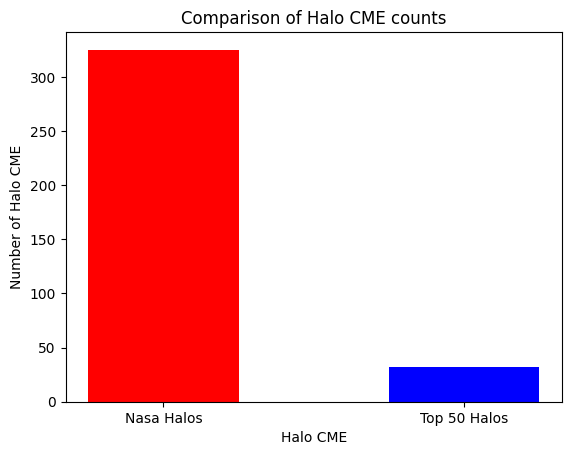

In [10]:
#Question 2 PT 3 
#Note: making Barplot

#two variables so we can compare in bar chart
halo_count = 0

halo50_count = 0

for i, j in nasa_data.iterrows():
    if j['is_halo'] == 'True':
        halo_count+= 1

for i, j in top50_flare_data.head(50).iterrows():
    if j['is_halo'] == 'True':
        halo50_count += 1

# Define the data
labels = ['Nasa Halos', 'Top 50 Halos']
counts = [halo_count, halo50_count]

# Create bar plot
plt.bar(labels, counts, color=['red', 'blue'], width = .5)

# Adding labels and title
plt.xlabel("Halo CME")
plt.ylabel("Number of Halo CME")
plt.title("Comparison of Halo CME counts")

plt.show()




#Our plot is a bar plot comparing the amount of Halos that Nasa flares has and the top 50. There are 325 halo_counts and there are 41 top50 halo counts. 
#The plot visually showcases the differences in central tendency and spread between the two datasets. 
#It also shows that the top50 flares usually do consist of a halo as 41/50(82%) shows a pretty high statistic.
